# **Unsupervised Learning**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv("Mall_Customers.csv")

In [26]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
df.shape

(200, 5)

# **Missing Values**

In [28]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# **Exploratory Data Analysis**

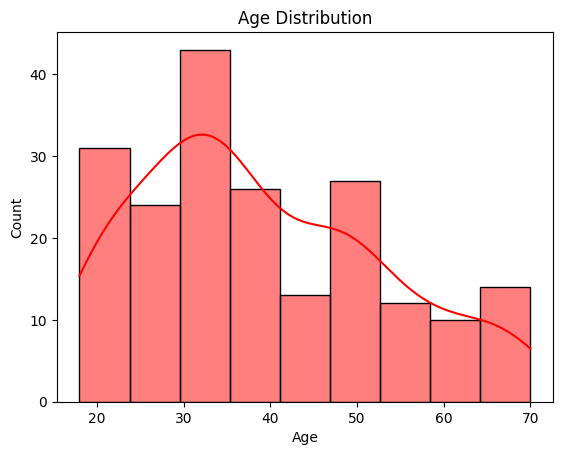

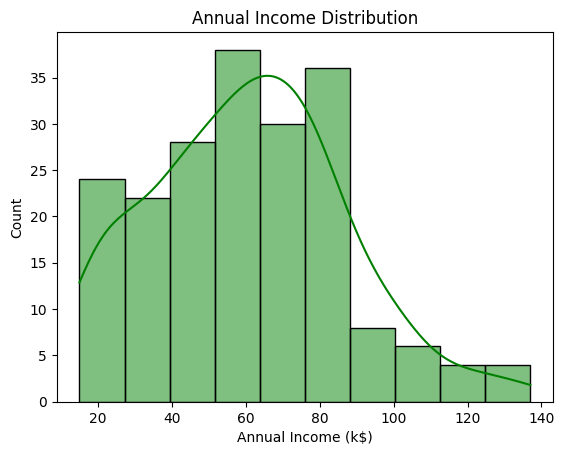

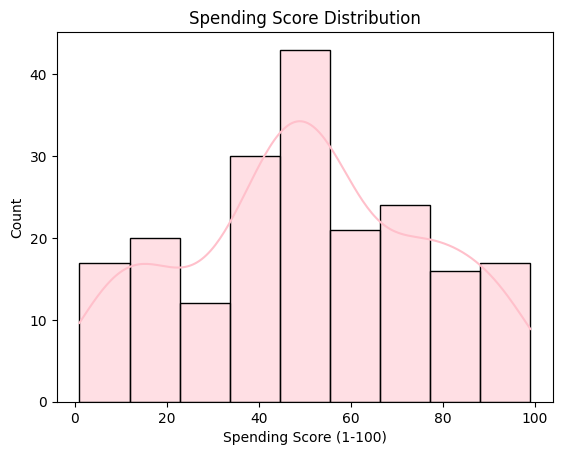

In [29]:
sns.histplot(data=df,x='Age',kde=True,color="red")
plt.title("Age Distribution")
plt.show()

sns.histplot(data=df,x='Annual Income (k$)',kde=True,color="green")
plt.title("Annual Income Distribution")
plt.show()

sns.histplot(data=df,x='Spending Score (1-100)',kde=True,color="pink")
plt.title("Spending Score Distribution")
plt.show()

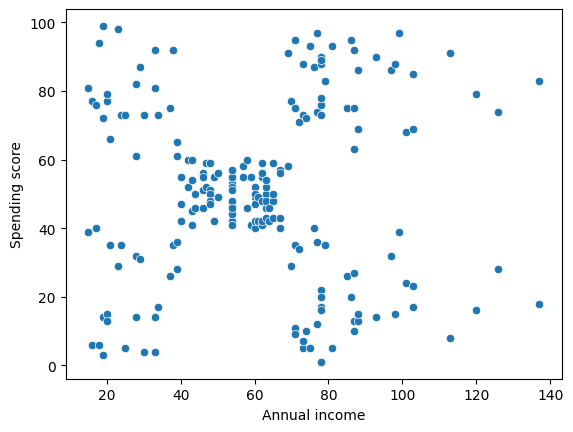

In [30]:
sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"])
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.show()

# **Elbow Method**

In [31]:
X = df.iloc[:,-2:]

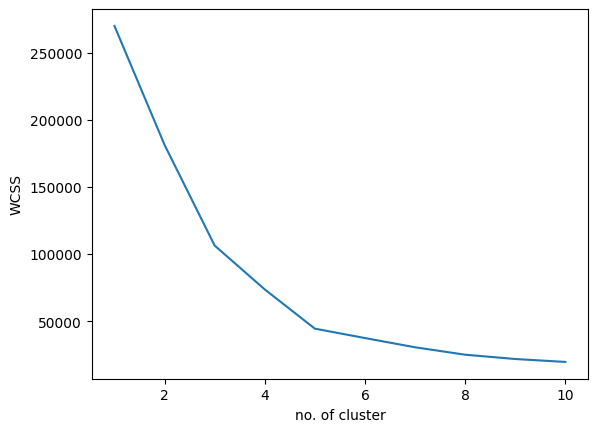

In [32]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel("no. of cluster")
plt.ylabel("WCSS")
plt.show()

# **K-MEANS Clustering**

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(X)

print(labels)


[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 2 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 4 1 2 1 4 1 4 1 2 1 4 1 4 1 4 1 4 1 2 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


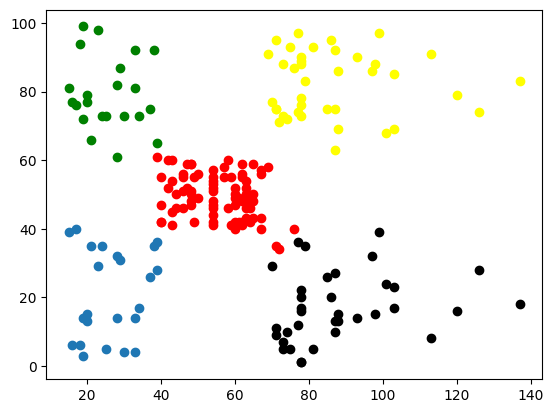

In [34]:
# filtering
plt.scatter(X.loc[labels==0,"Annual Income (k$)"],X.loc[labels==0,"Spending Score (1-100)"])
plt.scatter(X.loc[labels==1,"Annual Income (k$)"],X.loc[labels==1,"Spending Score (1-100)"],color="yellow")
plt.scatter(X.loc[labels==2,"Annual Income (k$)"],X.loc[labels==2,"Spending Score (1-100)"],color="red")
plt.scatter(X.loc[labels==3,"Annual Income (k$)"],X.loc[labels==3,"Spending Score (1-100)"],color="green")
plt.scatter(X.loc[labels==4,"Annual Income (k$)"],X.loc[labels==4,"Spending Score (1-100)"],color="black")

# **Hierarchical Clustering**

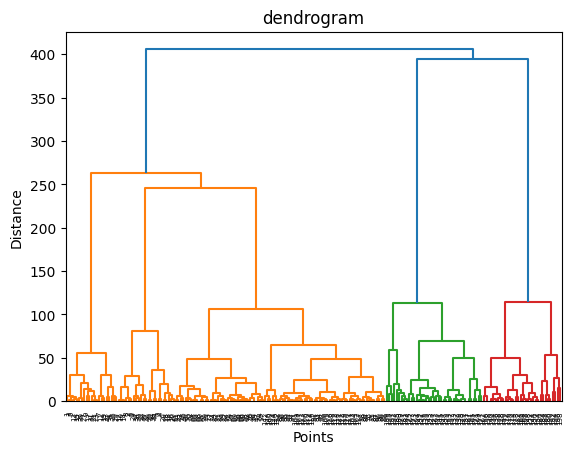

In [35]:
sch.dendrogram(sch.linkage(X,method="ward"))
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("dendrogram")
plt.show()
# ward method = difference between two cluster's variance

There are 5 sub bar in a large bar that's why we will make 5 clusters

In [36]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=5)
labels = agg.fit_predict(X)

In [38]:
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
